In [13]:
!pip install -U mxnet-cu101==1.7.0
!pip install gluoncv

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x3906a000 @  0x7f4311cb2615 0x591e47 0x4cc179 0x4cc2db 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
     |████████████████████████████████| 846.0MB 21kB/s 


In [1]:
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import mxnet as mx
import numpy as np
import cv2

In [2]:
ctx = mx.gpu(0)
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True, ctx=ctx)
person_ind = [i for i, cls in enumerate(net.classes) if cls == 'person'][0]

In [3]:
print(mx.context.gpu())

gpu(0)


In [13]:
vidcap = cv2.VideoCapture('VIRAT_S_000201_08_001652_001838.mp4')
success,image = vidcap.read()
count = 0

while success:
  img = mx.nd.array(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  x, img = data.transforms.presets.yolo.transform_test(img, short=512)

  # run the network
  x = x.as_in_context(ctx)
  class_IDs, scores, bounding_boxs = net(x)

  ids_arr = class_IDs[0].asnumpy()
  scores_arr = scores[0].asnumpy()
  boxes_arr = bounding_boxs[0].asnumpy()


  inds = np.where(ids_arr[:,0] == person_ind)[0]

  # extract only the people
  class_IDs = mx.nd.array(ids_arr[inds])
  scores = mx.nd.array(scores_arr[inds])
  bounding_boxs = mx.nd.array(boxes_arr[inds])

  success,image = vidcap.read()
  count += 1

True


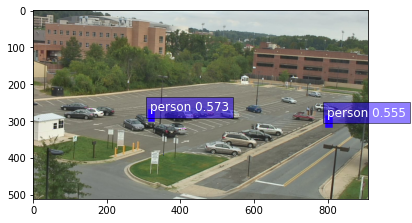

In [12]:
ax = utils.viz.plot_bbox(img, bounding_boxs, scores,
                         class_IDs, class_names=net.classes)
plt.show()